In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import mpl_toolkits.mplot3d as Axes3d
from einops import rearrange, repeat

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn, optim, reshape

# Question 2.1

In [2]:
transform = transforms.Compose([transforms.ToTensor()
                              ])
mnist_data = datasets.MNIST('./data', download=False, transform= transform)
subset_idx = torch.randperm(len(mnist_data))[:1000]
mnist_subset = torch.utils.data.Subset(mnist_data, subset_idx)

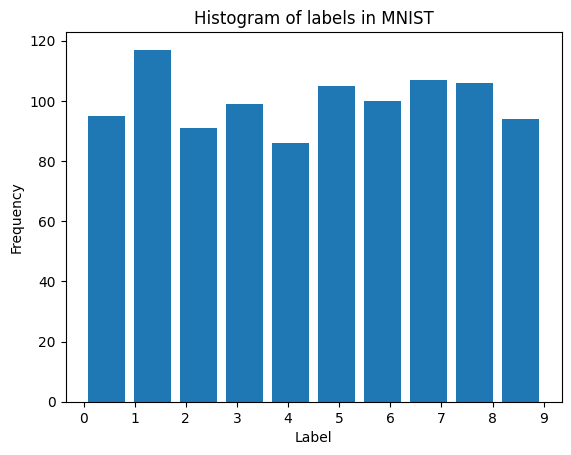

In [3]:
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]

# plot the histogram of the labels
plt.hist(labels, bins=10, range=(0, 9), rwidth=0.8)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of labels in MNIST')
plt.xticks(range(10))
plt.show()

In [4]:
subset_images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])
subset_labels = [mnist_subset[i][1] for i in range(len(mnist_subset))] 

batched_images = rearrange(subset_images, '(n b) c h w -> n b c h w', b=25)  # Now works with tensor
print("Batched images shape:", batched_images.shape)

Batched images shape: torch.Size([40, 25, 1, 28, 28])


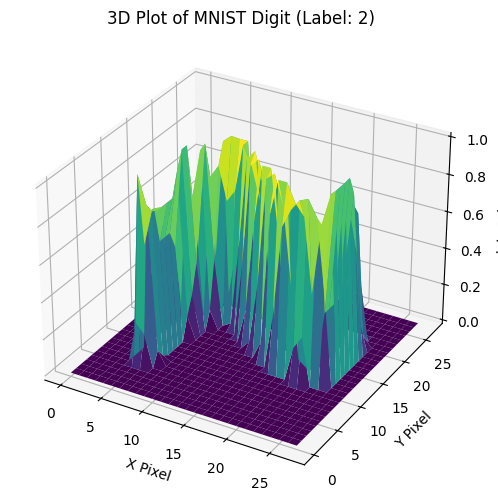

In [5]:
idx = np.random.randint(1000)
sample = subset_images[idx].squeeze().numpy()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x, y = np.mgrid[:28, :28]
ax.plot_surface(x, y, sample, cmap='viridis')
ax.set_title(f"3D Plot of MNIST Digit (Label: {subset_labels[idx]})")
ax.set_xlabel('X Pixel')
ax.set_ylabel('Y Pixel')
ax.set_zlabel('Intensity')
plt.show()

# Question 2.2

In [7]:
import pandas as pd
import seaborn as sns


energy_df = pd.read_csv('data/energydata_complete.csv', parse_dates=['date'])
energy_df.sort_values('date', inplace=True)

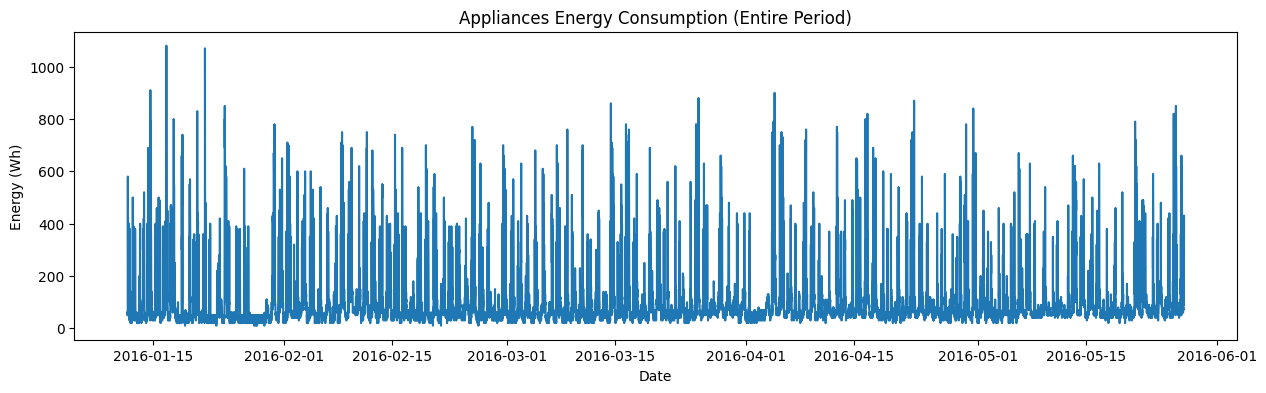

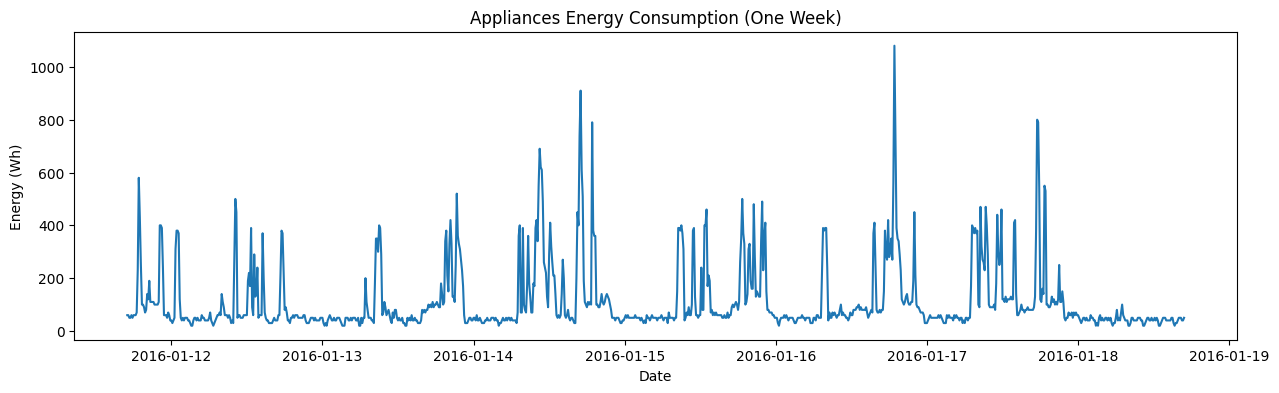

In [8]:
plt.figure(figsize=(15, 4))
plt.plot(energy_df['date'], energy_df['Appliances'])
plt.title("Appliances Energy Consumption (Entire Period)")
plt.xlabel("Date")
plt.ylabel("Energy (Wh)")
plt.show()

one_week = energy_df.iloc[:7*144]
plt.figure(figsize=(15, 4))
plt.plot(one_week['date'], one_week['Appliances'])
plt.title("Appliances Energy Consumption (One Week)")
plt.xlabel("Date")
plt.ylabel("Energy (Wh)")
plt.show()

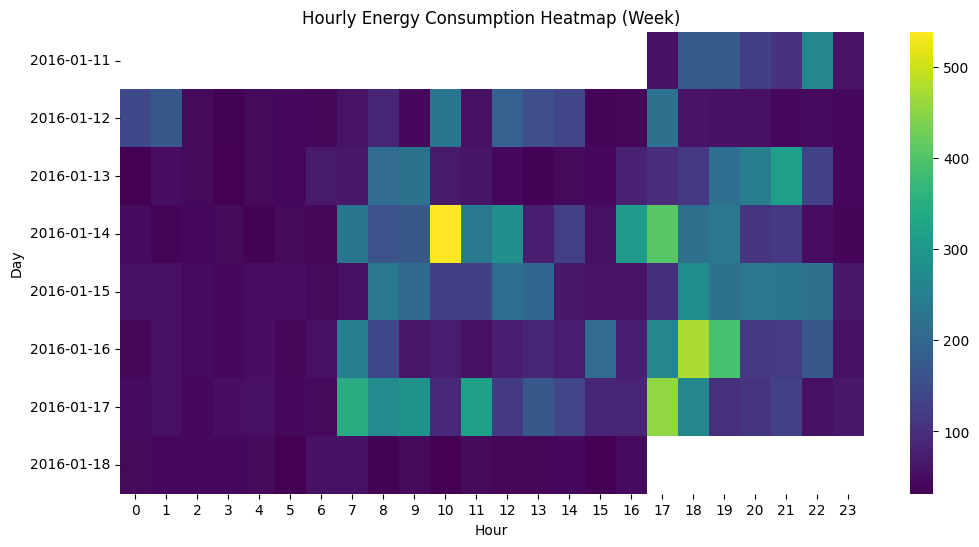

In [9]:
one_week = energy_df.iloc[:7*144].copy()
one_week['hour'] = one_week['date'].dt.hour
one_week['day'] = one_week['date'].dt.date

heatmap_data = one_week.pivot_table(index='day', columns='hour', values='Appliances', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title("Hourly Energy Consumption Heatmap (Week)")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()

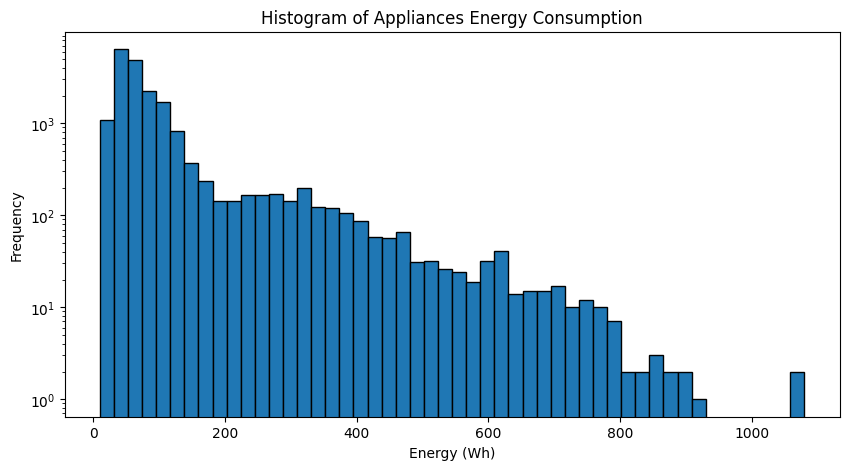

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(energy_df['Appliances'], bins=50, edgecolor='black')
plt.title("Histogram of Appliances Energy Consumption")
plt.xlabel("Energy (Wh)")
plt.ylabel("Frequency")
plt.yscale('log')  # Log scale for better visibility
plt.show()

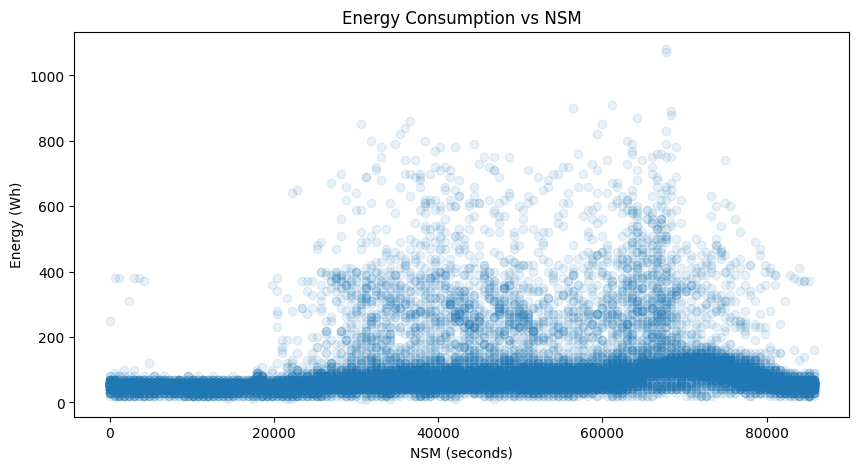

In [11]:
energy_df['NSM'] = energy_df['date'].dt.hour * 3600 + energy_df['date'].dt.minute * 60

plt.figure(figsize=(10, 5))
plt.scatter(energy_df['NSM'], energy_df['Appliances'], alpha=0.1)
plt.title("Energy Consumption vs NSM")
plt.xlabel("NSM (seconds)")
plt.ylabel("Energy (Wh)")
plt.show()

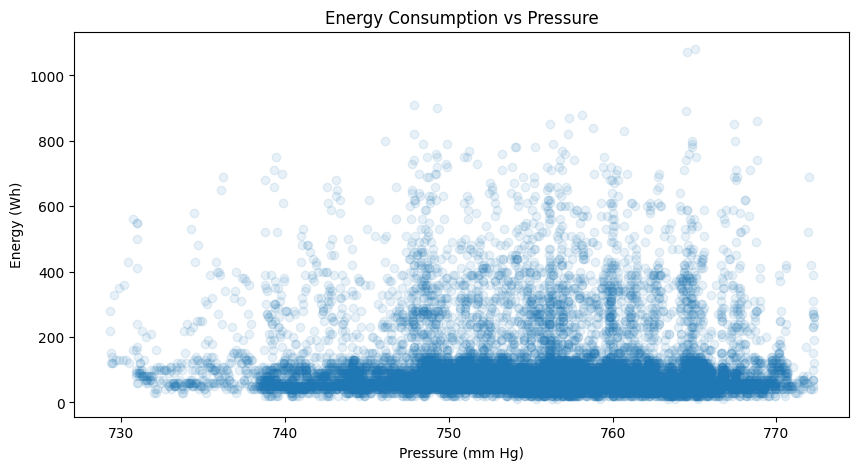

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(energy_df['Press_mm_hg'], energy_df['Appliances'], alpha=0.1)
plt.title("Energy Consumption vs Pressure")
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy (Wh)")
plt.show()


NSM (time) shows diurnal patterns, while pressure may correlate with HVAC usage.

# Question 2.3

In [14]:
airfoil_df = pd.read_csv('data/airfoil+self+noise/airfoil_self_noise.dat', sep='\t', header=None, 
                        names=['Frequency', 'AoA', 'Chord', 'Velocity', 'Thickness', 'SoundLevel'])

stats = pd.DataFrame()
stats['Mean'] = airfoil_df.mean()
stats['Variance'] = airfoil_df.var()
stats['Median'] = airfoil_df.median()
stats['Kurtosis'] = airfoil_df.kurtosis()
stats['Skewness'] = airfoil_df.skew()
stats['Range'] = airfoil_df.max() - airfoil_df.min()

print(stats)

                   Mean      Variance       Median  Kurtosis  Skewness  \
Frequency   2886.380572  9.938717e+06  1600.000000  5.708685  2.137084   
AoA            6.782302  3.502424e+01     5.400000 -0.412951  0.689164   
Chord          0.136548  8.749868e-03     0.101600 -1.037964  0.457457   
Velocity      50.860745  2.425116e+02    39.600000 -1.563951  0.235852   
Thickness      0.011140  1.729287e-04     0.004957  2.218903  1.702165   
SoundLevel   124.835943  4.759146e+01   125.721000 -0.314187 -0.418952   

                   Range  
Frequency   19800.000000  
AoA            22.200000  
Chord           0.279400  
Velocity       39.600000  
Thickness       0.058011  
SoundLevel     37.607000  
